# Data Analytics Club Submission
### Melinda Gomez Tellez

In [50]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None,'display.max_columns', None)

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import pickle
from sklearn.externals import joblib

#full screen for notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_train.isnull().values.any()

False

In [5]:
df_test.isnull().values.any()

False

### A. KNN - Baseline Performance, K = 3

Without even looking at the features, my first thought is to use KNN to set a basleine. This is a multi-class case and KNN is easy to use and understand by calculating distances. 

**1. Assess how balanced/unbalanced the training dataset is**

In [6]:
df_train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

**2. Split training model into train/test to test performance and then run and test model**

In [7]:
X = df_train[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
y = df_train['price_range']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[169,   6,   0,   0],
       [ 12, 136,  11,   0],
       [  0,   7, 154,  10],
       [  0,   0,  13, 142]])

In [8]:
print('F1_Score: ',f1_score(y_test, y_pred, average="macro"))
print('Precision: ',precision_score(y_test, y_pred, average="macro"))
print('Recall: ',recall_score(y_test, y_pred, average="macro"))
print('Accuracy: ',accuracy_score(y_test, y_pred))   

F1_Score:  0.9100395021400441
Precision:  0.9114581002381361
Recall:  0.9094435063109183
Accuracy:  0.9106060606060606


Out of the gate, we have over 90% across accuracy, precision, recall and F1_Score. This seems like a pretty positive first pass!

**3. Now lets find the optimal number of n_neighbors and retest** 

In [9]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 11}

In [10]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='auto', metric='euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[171,   4,   0,   0],
       [  7, 149,   3,   0],
       [  0,  12, 154,   5],
       [  0,   0,  14, 141]])

In [11]:
print('F1_Score: ',f1_score(y_test, y_pred, average="macro"))
print('Precision: ',precision_score(y_test, y_pred, average="macro"))
print('Recall: ',recall_score(y_test, y_pred, average="macro"))
print('Accuracy: ',accuracy_score(y_test, y_pred))  

F1_Score:  0.931513371266383
Precision:  0.9325106700782114
Recall:  0.9311279975145818
Accuracy:  0.9318181818181818


Without even doing any initial analysis on the variables, we are already at over 93% accuracy for a balanced multi-classification problem. 

### B. Data Exploration

**1. Numeric Data Types**

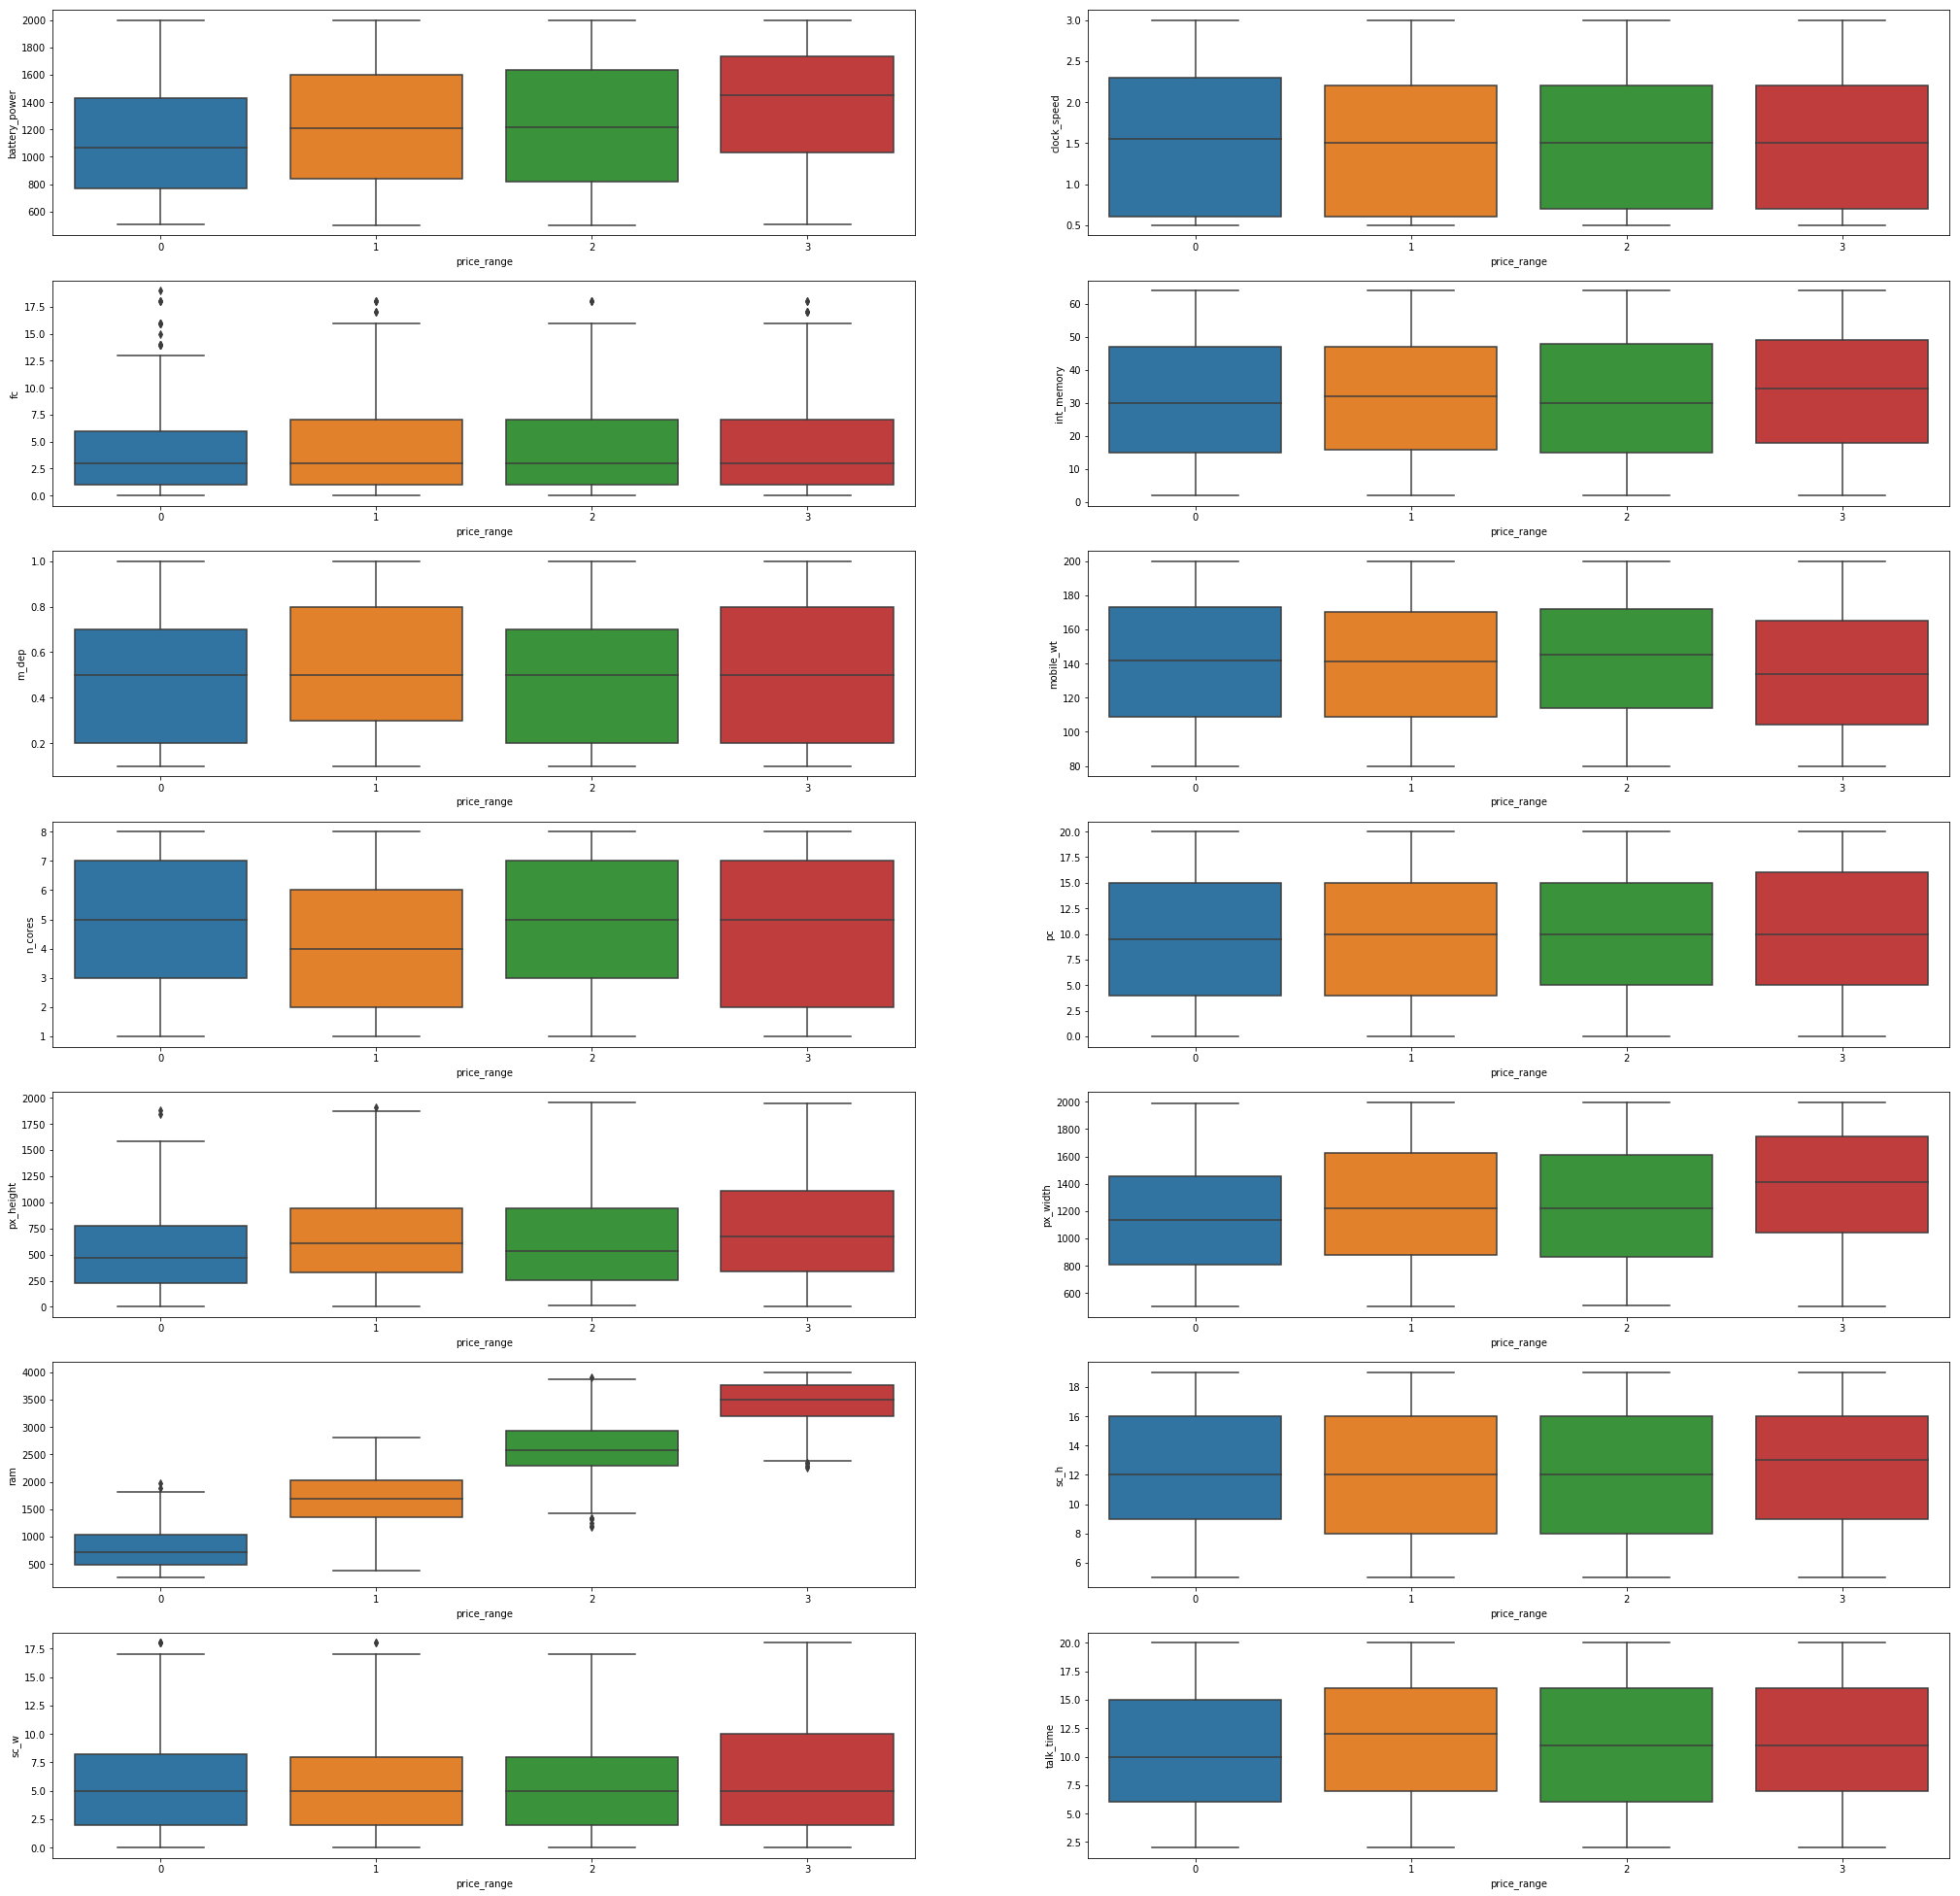

In [12]:
f, axes = plt.subplots(7, 2, figsize=(35, 35))

sns.boxplot(x='price_range', y='battery_power', data=df_train, ax=axes[0,0])
sns.boxplot(x='price_range', y='clock_speed', data=df_train, ax=axes[0,1])
sns.boxplot(x='price_range', y='fc', data=df_train, ax=axes[1,0])
sns.boxplot(x='price_range', y='int_memory', data=df_train, ax=axes[1,1])
sns.boxplot(x='price_range', y='m_dep', data=df_train, ax=axes[2,0])
sns.boxplot(x='price_range', y='mobile_wt', data=df_train, ax=axes[2,1])
sns.boxplot(x='price_range', y='n_cores', data=df_train, ax=axes[3,0])
sns.boxplot(x='price_range', y='pc', data=df_train, ax=axes[3,1])
sns.boxplot(x='price_range', y='px_height', data=df_train, ax=axes[4,0])
sns.boxplot(x='price_range', y='px_width', data=df_train, ax=axes[4,1])
sns.boxplot(x='price_range', y='ram', data=df_train, ax=axes[5,0])
sns.boxplot(x='price_range', y='sc_h', data=df_train, ax=axes[5,1])
sns.boxplot(x='price_range', y='sc_w', data=df_train, ax=axes[6,0])
sns.boxplot(x='price_range', y='talk_time', data=df_train, ax=axes[6,1])

What we see with this initial analysis for the features that have a numeric data type is that RAM has a clear correlation to the price range bucket that a phone falls into. I now have some initial doubts about using KNN as looking at the ranges of data show RAM on the largest scale which means its distance is driving the predictive model. None of the other numeric features are showing strong trends with the target - price_range. 

**2. Boolean Data Types** 

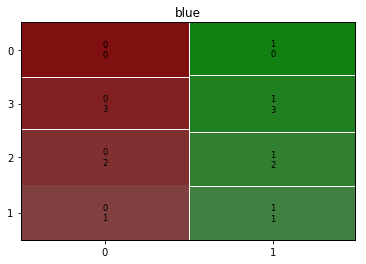

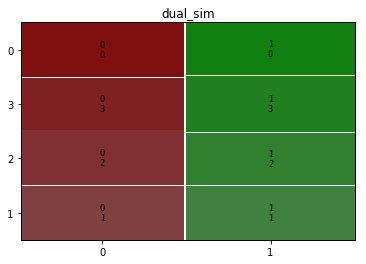

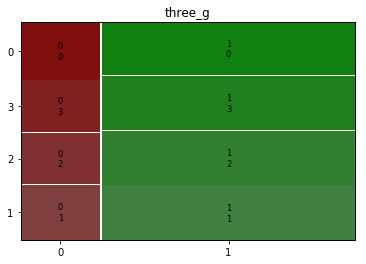

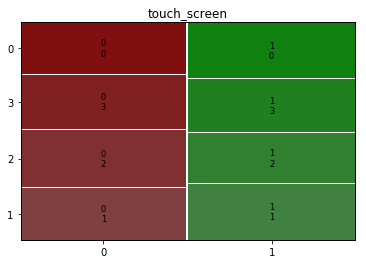

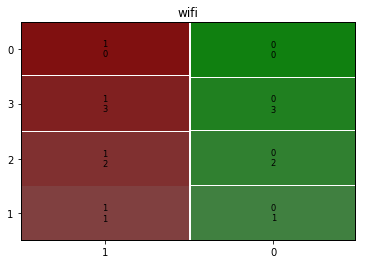

In [13]:
mosaic(df_train, ['blue','price_range'], title = 'blue')
plt.show()

mosaic(df_train, ['dual_sim','price_range'], title = 'dual_sim')
plt.show()

mosaic(df_train, ['three_g','price_range'], title = 'three_g')
plt.show()

mosaic(df_train, ['touch_screen','price_range'], title = 'touch_screen')
plt.show()

mosaic(df_train, ['wifi','price_range'], title = 'wifi')
plt.show()

In [14]:
df = df_train[['blue','dual_sim','three_g','touch_screen','wifi','price_range']]
df['cnt_flag'] = 1

df1 = pd.pivot_table(df, index='price_range',columns='blue', values='cnt_flag', aggfunc='count')
df2 = pd.pivot_table(df, index='price_range',columns='dual_sim', values='cnt_flag', aggfunc='count')
df3 = pd.pivot_table(df, index='price_range',columns='three_g', values='cnt_flag', aggfunc='count')
df4 = pd.pivot_table(df, index='price_range',columns='touch_screen', values='cnt_flag', aggfunc='count')
df5 = pd.pivot_table(df, index='price_range',columns='wifi', values='cnt_flag', aggfunc='count')

#display(df1,df2,df3,df4,df5)
#run if want to look at tables

/opt/cloudera/parcels/Anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


No clear pattern with boolean data type features.

**3. Pearson's Correlation to eliminate highly correlated numeric features**

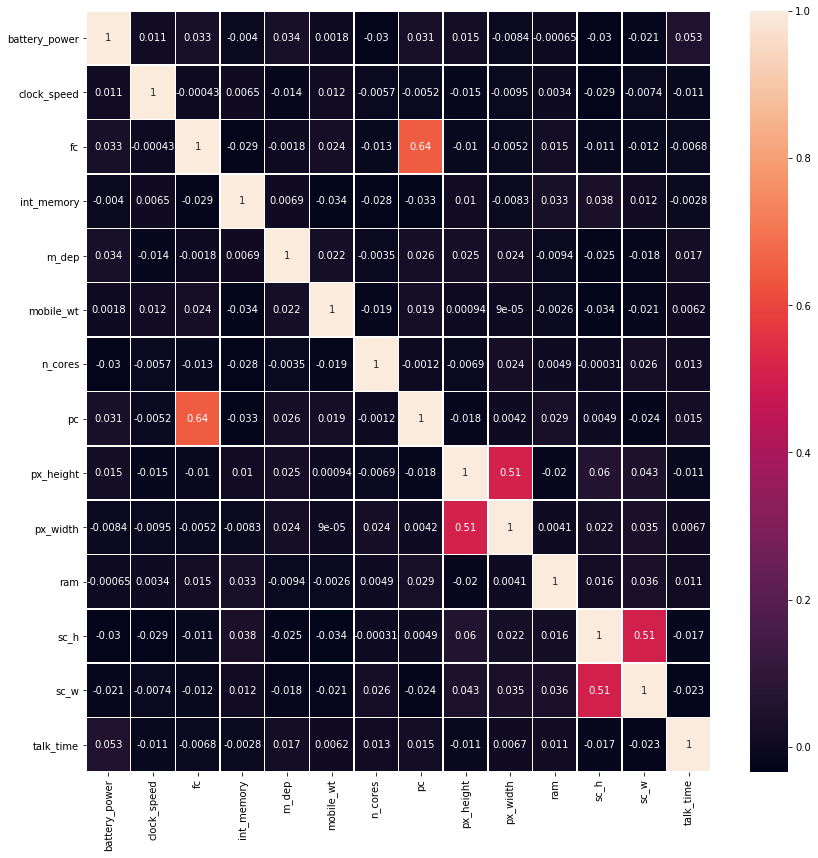

In [15]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].corr(method ='pearson'), annot=True, ax=ax, linewidths=.5)

We see high correlation (using the Pearson scale) between features sc_h and sc_w and features px_height and px_width.  Looking at the boxplots, sc_w trend up better than sc_h and so does px_height, so we could remove sc_h and px_width if we are concerned about collinearity.

In [ ]:
#df_train = df_train.drop(['sc_h', 'px_width'], axis=1)
#df_test = df_test.drop(['sc_h', 'px_width'], axis=1)

### C. Most Influential Features

**1. Find most important feature compared to target.**

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X1 = np.array(X)
y1 = np.array(y)

clf = KNeighborsClassifier()

print('Feature  Accuracy')
for i in range(20):
    X2 = X1[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X2, y1)
    #print('%d        %g' % (i, scores.mean()))
    print(X.columns[i],' (%d) --> %g' % (i, scores.mean()))

Feature  Accuracy
battery_power  (0) --> 0.266984
blue  (1) --> 0.249985
clock_speed  (2) --> 0.24348
dual_sim  (3) --> 0.247499
fc  (4) --> 0.227518
four_g  (5) --> 0.251509
int_memory  (6) --> 0.261465
m_dep  (7) --> 0.256484
mobile_wt  (8) --> 0.250995
n_cores  (9) --> 0.256511
pc  (10) --> 0.256529
px_height  (11) --> 0.263509
px_width  (12) --> 0.25649
ram  (13) --> 0.728489
sc_h  (14) --> 0.244496
sc_w  (15) --> 0.25251
talk_time  (16) --> 0.248443
three_g  (17) --> 0.250021
touch_screen  (18) --> 0.248449
wifi  (19) --> 0.24048


This analysis validates what was earlier thought in the data exploration, ram is the dominant feature of importance. 

**2. Identify the top most influential features and their effect on predicting the target.**

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X1 = np.array(X)
y1 = np.array(y)

clf = KNeighborsClassifier()

print('Feature  Accuracy')
for i in range(20):
    X2 = np.concatenate((X1[:,13].reshape(-1, 1),X1[:,i].reshape(-1, 1)),axis=1)
    scores = cross_val_score(clf, X2, y1)
    #print('%d        %g' % (i, scores.mean()))
    print(X.columns[13],' + ',X.columns[i],' (%d) --> %g' % (i, scores.mean()))

Feature  Accuracy
ram  +  battery_power  (0) --> 0.795
ram  +  blue  (1) --> 0.727993
ram  +  clock_speed  (2) --> 0.728985
ram  +  dual_sim  (3) --> 0.729499
ram  +  fc  (4) --> 0.731516
ram  +  four_g  (5) --> 0.728994
ram  +  int_memory  (6) --> 0.720995
ram  +  m_dep  (7) --> 0.724491
ram  +  mobile_wt  (8) --> 0.727527
ram  +  n_cores  (9) --> 0.728492
ram  +  pc  (10) --> 0.727993
ram  +  px_height  (11) --> 0.771505
ram  +  px_width  (12) --> 0.762511
ram  +  ram  (13) --> 0.728489
ram  +  sc_h  (14) --> 0.724987
ram  +  sc_w  (15) --> 0.729487
ram  +  talk_time  (16) --> 0.733482
ram  +  three_g  (17) --> 0.727987
ram  +  touch_screen  (18) --> 0.727497
ram  +  wifi  (19) --> 0.72499


In [18]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X1 = np.array(X)
y1 = np.array(y)

clf = KNeighborsClassifier()

print('Feature  Accuracy')
for i in range(20):
    X2 = np.concatenate((X1[:,13].reshape(-1, 1),X1[:,0].reshape(-1, 1),X1[:,i].reshape(-1, 1)),axis=1)
    scores = cross_val_score(clf, X2, y1)
    #print('%d        %g' % (i, scores.mean()))
    print(X.columns[13],' + battery + ',X.columns[i],' (%d) --> %g' % (i, scores.mean()))

Feature  Accuracy
ram  + battery +  battery_power  (0) --> 0.794507
ram  + battery +  blue  (1) --> 0.795
ram  + battery +  clock_speed  (2) --> 0.795
ram  + battery +  dual_sim  (3) --> 0.795
ram  + battery +  fc  (4) --> 0.795
ram  + battery +  four_g  (5) --> 0.795
ram  + battery +  int_memory  (6) --> 0.793993
ram  + battery +  m_dep  (7) --> 0.795
ram  + battery +  mobile_wt  (8) --> 0.799494
ram  + battery +  n_cores  (9) --> 0.795
ram  + battery +  pc  (10) --> 0.793999
ram  + battery +  px_height  (11) --> 0.889991
ram  + battery +  px_width  (12) --> 0.879996
ram  + battery +  ram  (13) --> 0.796512
ram  + battery +  sc_h  (14) --> 0.795
ram  + battery +  sc_w  (15) --> 0.795499
ram  + battery +  talk_time  (16) --> 0.794002
ram  + battery +  three_g  (17) --> 0.795
ram  + battery +  touch_screen  (18) --> 0.795
ram  + battery +  wifi  (19) --> 0.795


In [19]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X1 = np.array(X)
y1 = np.array(y)

clf = KNeighborsClassifier()

print('Feature  Accuracy')
for i in range(20):
    X2 = np.concatenate((X1[:,13].reshape(-1, 1),X1[:,0].reshape(-1, 1),X1[:,11].reshape(-1, 1),X1[:,i].reshape(-1, 1)),axis=1)
    scores = cross_val_score(clf, X2, y1)
    #print('%d        %g' % (i, scores.mean()))
    print('ram + battery + pc_height + ',X.columns[i],' (%d) --> %g' % (i, scores.mean()))

Feature  Accuracy
ram + battery + pc_height +  battery_power  (0) --> 0.882488
ram + battery + pc_height +  blue  (1) --> 0.889991
ram + battery + pc_height +  clock_speed  (2) --> 0.889991
ram + battery + pc_height +  dual_sim  (3) --> 0.889991
ram + battery + pc_height +  fc  (4) --> 0.889991
ram + battery + pc_height +  four_g  (5) --> 0.889991
ram + battery + pc_height +  int_memory  (6) --> 0.888993
ram + battery + pc_height +  m_dep  (7) --> 0.889991
ram + battery + pc_height +  mobile_wt  (8) --> 0.887995
ram + battery + pc_height +  n_cores  (9) --> 0.889991
ram + battery + pc_height +  pc  (10) --> 0.890493
ram + battery + pc_height +  px_height  (11) --> 0.883507
ram + battery + pc_height +  px_width  (12) --> 0.926009
ram + battery + pc_height +  ram  (13) --> 0.887992
ram + battery + pc_height +  sc_h  (14) --> 0.889991
ram + battery + pc_height +  sc_w  (15) --> 0.889991
ram + battery + pc_height +  talk_time  (16) --> 0.889991
ram + battery + pc_height +  three_g  (17) --

In [20]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X1 = np.array(X)
y1 = np.array(y)

clf = KNeighborsClassifier()

print('Feature  Accuracy')
for i in range(20):
    X2 = np.concatenate((X1[:,13].reshape(-1, 1),X1[:,0].reshape(-1, 1),X1[:,11].reshape(-1, 1),X1[:,12].reshape(-1, 1),X1[:,i].reshape(-1, 1)),axis=1)
    scores = cross_val_score(clf, X2, y1)
    #print('%d        %g' % (i, scores.mean()))
    print('ram + battery + px_height + px_width + ',X.columns[i],' (%d) --> %g' % (i, scores.mean()))

Feature  Accuracy
ram + battery + px_height + px_width +  battery_power  (0) --> 0.920018
ram + battery + px_height + px_width +  blue  (1) --> 0.926009
ram + battery + px_height + px_width +  clock_speed  (2) --> 0.926009
ram + battery + px_height + px_width +  dual_sim  (3) --> 0.926009
ram + battery + px_height + px_width +  fc  (4) --> 0.926009
ram + battery + px_height + px_width +  four_g  (5) --> 0.926009
ram + battery + px_height + px_width +  int_memory  (6) --> 0.926508
ram + battery + px_height + px_width +  m_dep  (7) --> 0.926009
ram + battery + px_height + px_width +  mobile_wt  (8) --> 0.924503
ram + battery + px_height + px_width +  n_cores  (9) --> 0.926009
ram + battery + px_height + px_width +  pc  (10) --> 0.926009
ram + battery + px_height + px_width +  px_height  (11) --> 0.925002
ram + battery + px_height + px_width +  px_width  (12) --> 0.922005
ram + battery + px_height + px_width +  ram  (13) --> 0.924001
ram + battery + px_height + px_width +  sc_h  (14) --> 

### D. Normalize and Weight Features Manually

In [37]:
# Get column names first of numeric fields
names = ['battery_power', 'clock_speed', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time']

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
train_scaled_df = scaler.fit_transform(df_train[names])
train_scaled_df = pd.DataFrame(train_scaled_df, columns=names)

df_train2 = pd.merge(train_scaled_df[names], df_train[['blue','dual_sim','three_g','touch_screen','wifi','price_range']], left_index=True, right_index=True)

test_scaled_df = scaler.fit_transform(df_test[names])
test_scaled_df = pd.DataFrame(test_scaled_df, columns=names)

df_test2 = pd.merge(test_scaled_df[names], df_test[['blue','dual_sim','three_g','touch_screen','wifi']], left_index=True, right_index=True)

In [38]:
df_train2.head()

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,three_g,touch_screen,wifi,price_range
0,-0.902597,0.830779,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,0,0,1,1
1,-0.495139,-1.253064,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,1,1,0,2
2,-1.537686,-1.253064,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,1,1,0,2
3,-1.419319,1.198517,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,1,0,0,2
4,1.325906,-0.395011,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,0,1,1,0,1


After finding the most influential featurs, it would make sense to weight these features more heavily than others after normalizing as we know they are a bigger driver in predicting the target. 

In [39]:
df_train2['ram'] = df_train2['ram']*7
df_test2['ram'] = df_test2['ram']*7

df_train2['battery_power'] = df_train2['battery_power']*2.6
df_test2['battery_power'] = df_test2['battery_power']*2.6

df_train2['px_height'] = df_train2['px_height']*2.5
df_test2['px_height'] = df_test2['px_height']*2.5

df_train2['px_width'] = df_train2['px_width']*2.5
df_test2['px_width'] = df_test2['px_width']*2.5

In [40]:
X = df_train2[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
y = df_train2['price_range']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [41]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 13}

In [42]:
knn = KNeighborsClassifier(n_neighbors=13, algorithm='auto', metric='euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[171,   4,   0,   0],
       [  8, 144,   7,   0],
       [  0,  13, 151,   7],
       [  0,   0,  16, 139]])

In [43]:
print('F1_Score: ',f1_score(y_test, y_pred, average="macro"))
print('Precision: ',precision_score(y_test, y_pred, average="macro"))
print('Recall: ',recall_score(y_test, y_pred, average="macro"))
print('Accuracy: ',accuracy_score(y_test, y_pred)) 

F1_Score:  0.9162630134057359
Precision:  0.9173970217331505
Recall:  0.9156545909305622
Accuracy:  0.9166666666666666


### E. ID3 Model -- Gut check with a different algorithm

In [28]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
#Function for predictions
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    #print("Predicted values:") 
    #print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 



In [29]:
#Run Code
def main(): 
      
    # Building Phase 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)

# Calling main function 
if __name__=="__main__": 
    main() 

Results Using Gini Index:
Confusion Matrix:  [[136  39   0   0]
 [  6 129  24   0]
 [  0  39 107  25]
 [  0   0  38 117]]
Accuracy :  74.0909090909091
Report :               precision    recall  f1-score   support

          0       0.96      0.78      0.86       175
          1       0.62      0.81      0.70       159
          2       0.63      0.63      0.63       171
          3       0.82      0.75      0.79       155

avg / total       0.76      0.74      0.75       660

Results Using Entropy:
Confusion Matrix:  [[140  35   0   0]
 [  8 127  24   0]
 [  0  39  98  34]
 [  0   0  25 130]]
Accuracy :  75.0
Report :               precision    recall  f1-score   support

          0       0.95      0.80      0.87       175
          1       0.63      0.80      0.71       159
          2       0.67      0.57      0.62       171
          3       0.79      0.84      0.82       155

avg / total       0.76      0.75      0.75       660



In [30]:
X1 = np.array(X)
y1 = np.array(y)

clf = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5)

print('Feature  Accuracy')
for i in range(20):
    X2 = X1[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X2, y1)
    #print('%d        %g' % (i, scores.mean()))
    print(X.columns[i],' (%d) --> %g' % (i, scores.mean()))

Feature  Accuracy
battery_power  (0) --> 0.321508
blue  (1) --> 0.242527
clock_speed  (2) --> 0.243023
dual_sim  (3) --> 0.247493
fc  (4) --> 0.245494
four_g  (5) --> 0.263993
int_memory  (6) --> 0.256496
m_dep  (7) --> 0.245987
mobile_wt  (8) --> 0.245957
n_cores  (9) --> 0.25753
pc  (10) --> 0.251007
px_height  (11) --> 0.285498
px_width  (12) --> 0.29001
ram  (13) --> 0.754488
sc_h  (14) --> 0.260482
sc_w  (15) --> 0.244484
talk_time  (16) --> 0.243501
three_g  (17) --> 0.245996
touch_screen  (18) --> 0.253986
wifi  (19) --> 0.240979


### F. Save Model and run test.csv through pickel file

In [45]:
X = df_train[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
y = df_train['price_range']
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 11}

In [46]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='auto', metric='euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[171,   4,   0,   0],
       [  7, 149,   3,   0],
       [  0,  12, 154,   5],
       [  0,   0,  14, 141]])

In [47]:
print('F1_Score: ',f1_score(y_test, y_pred, average="macro"))
print('Precision: ',precision_score(y_test, y_pred, average="macro"))
print('Recall: ',recall_score(y_test, y_pred, average="macro"))
print('Accuracy: ',accuracy_score(y_test, y_pred))

F1_Score:  0.931513371266383
Precision:  0.9325106700782114
Recall:  0.9311279975145818
Accuracy:  0.9318181818181818


In [48]:
filename = 'KNN_Model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [56]:
#load saved model
X = df_test[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]

loaded_mod = joblib.load('KNN_Model.sav')
result = loaded_mod.predict(X)
result = pd.DataFrame({'Pred_Price_Range':result})
mod_output = pd.merge(X,result, how='inner', left_index=True, right_index=True)

In [57]:
mod_output.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Pred_Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1


In [61]:
mod_output.groupby(['Pred_Price_Range']).agg({'battery_power':'count'})

,battery_power
Pred_Price_Range,
0,258
1,227
2,263
3,252


In [63]:
mod_output.to_csv('test_output.csv')